In [1]:
import pandas as pd
df = pd.read_csv("./resource/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.shape

(918, 12)

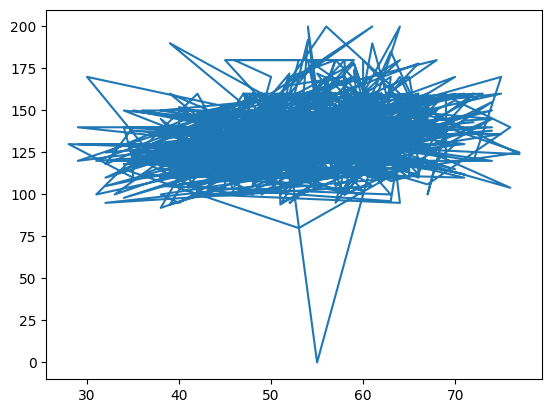

In [4]:
from matplotlib import pyplot as plt
plt.plot(df.Age, df.RestingBP)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
df = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df = df[df.Age<=(df.Age.mean()+3*df.Age.std())]
df = df[df.RestingBP<=(df.RestingBP.mean()+3*df.RestingBP.std())]
df = df[df.FastingBS<=(df.FastingBS.mean()+3*df.FastingBS.std())]
df = df[df.MaxHR<=(df.MaxHR.mean()+3*df.MaxHR.std())]
df = df[df.Oldpeak<=(df.Oldpeak.mean()+3*df.Oldpeak.std())]
df = df[df.HeartDisease<=(df.HeartDisease.mean()+3*df.HeartDisease.std())]

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
dummies = pd.get_dummies(df, drop_first=True)
dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [34]:
from sklearn.model_selection import train_test_split
X = dummies.drop(['HeartDisease', ], axis='columns')
y = dummies.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_svm = SVC()
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.7348066298342542

In [37]:
model_logistic_reg = LogisticRegression(max_iter=10000)
model_logistic_reg.fit(X_train,y_train)
model_logistic_reg.score(X_test,y_test)

0.8729281767955801

In [38]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
model_rfc.score(X_test,y_test)

0.8950276243093923

In [39]:
from sklearn.decomposition import PCA
pca = PCA(.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82516575, -29.40343477],
       [-15.58380044, -14.10534714],
       [ 83.29544144,  38.68553968],
       ...,
       [-67.57277874,  17.61565402],
       [ 40.70355216, -33.38308603],
       [-19.9132065 , -37.29321338]])

In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size=0.2)

In [41]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)

0.6408839779005525

In [42]:
model = RandomForestClassifier()
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)

0.6795580110497238